# 2DEG mobility calculation using analytical formula

Ref-1: J. Bassaler, J. Mehta, I. Abid, L. Konczewicz, S. Juillaguet, S. Contreras, S. Rennesson, S. Tamariz, M. Nemoz, F. Semond, J. Pernot, F. Medjdoub, Y. Cordier, P. Ferrandis, Al-Rich AlGaN Channel High Electron Mobility Transistors on Silicon: A Relevant Approach for High Temperature Stability of Electron Mobility. Adv. Electron. Mater. 2024, 2400069. https://doi.org/10.1002/aelm.202400069

Ref-2: Zhang, J., Hao, Y., Zhang, J. et al. The mobility of two-dimensional electron gas in AlGaN/GaN heterostructures with varied Al content. Sci. China Ser. F-Inf. Sci. 51, 780–789 (2008). https://doi.org/10.1007/s11432-008-0056-7


# 1. Settings

## 1.1 Import modules

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
from pathlib import Path
mobilitypy_tutorial_path = Path().absolute()
sys.path.insert(0, os.path.join(mobilitypy_tutorial_path, '../'))
from mobilitypy import AlloyParams, Mobility2DEG, Plottings

In [4]:
save_figure_dir = '/home/Docs5/badal.mondal/linuxhome/MyFolder/Projects/DeviceSimulation/MobilityCalc2DEG/mobilitypy/imgs'
save_file_name = 'mobilities'

## 1.2 Set physical constants

In [5]:
'''
n_2d => in nm^-2
rms_roughness => nm^-1
corr_len => nm^-1
n_dis => nm^-2
f_dis => unit less
'''
alloy_disordered_effect=1
interface_roughness_effect=1
dislocation_effect=1
deformation_potential_effect=1 
piezoelectric_effect=1
acoustic_phonon_effect=1
polar_optical_phonon_effect=1
total_mobility=1
mobility_model='Bassaler'
density_2deg = 0.1 # nm^-2
irf_rms_roughness = 0.3 # nm
irf_corr_length = 3.0 # nm
dislocation_density = 1e-4 # nm^-2
occup_dislocation = 0.3
T=300 #K

# 2. Calculate mobilities

In [6]:
compositions = np.linspace(0,1,101)
mu2deg = Mobility2DEG(compositions=compositions, binaries=['AlN', 'GaN'], alloy='AlGaN', system='ternary')

In [7]:
mobility_df = mu2deg.calculate_mobility(n_2d=density_2deg, rms_roughness=irf_rms_roughness, 
                                        corr_len=irf_corr_length, n_dis=dislocation_density, 
                                        f_dis=occup_dislocation, T=T,
                                        alloy_disordered_effect=alloy_disordered_effect,
                                        interface_roughness_effect=interface_roughness_effect,
                                        dislocation_effect=dislocation_effect,
                                        deformation_potential_effect=deformation_potential_effect,
                                        piezoelectric_effect=piezoelectric_effect,
                                        acoustic_phonon_effect=acoustic_phonon_effect,
                                        polar_optical_phonon_effect=polar_optical_phonon_effect,
                                        total_mobility=total_mobility,
                                        mobility_model=mobility_model)

/home/Docs5/badal.mondal/linuxhome/MyFolder/Projects/DeviceSimulation/MobilityCalc2DEG/mobilitypy/tutorials/../mobilitypy/src/_mobilities_2deg.py:287: RuntimeWarning: divide by zero encountered in scalar divide
  return 1e4/(self.m0_by_e_ * inv_sc)


In [8]:
# Unit of lateral_FOM: W/cm^2
lateral_FOM = mu2deg.calculate_figure_of_merit(density_2deg, np.array(mobility_df['TOT']))
composition_axis = np.array(mobility_df['comp'], dtype=float)
data_FOM_2_plot = np.column_stack((composition_axis, lateral_FOM/1e6))# LFOM: MW/cm^2

# 3. Plot mobilities

In [9]:
plt2deg = Plottings(save_figure_dir=save_figure_dir)
x_label = 'Al composition'
y_label = r'Electron mobility ($\mathrm{cm}^2\mathrm{V}^{-1}\mathrm{s}^{-1}$)'

In [10]:
save_file_name_ = f'{save_file_name}_{T}K.png'
fig, ax,_ = plt2deg.plot_2deg_mobilities(mobility_df, save_file_name=save_file_name_,
                                         ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True, 
                                         annotate_pos=(11,11), show_right_ticks=True,
                                         mode='2deg_mobility', yaxis_label=y_label, xaxis_label=x_label,
                                         color=None, color_map='viridis', savefig=1, dpi=75, show_plot=True)

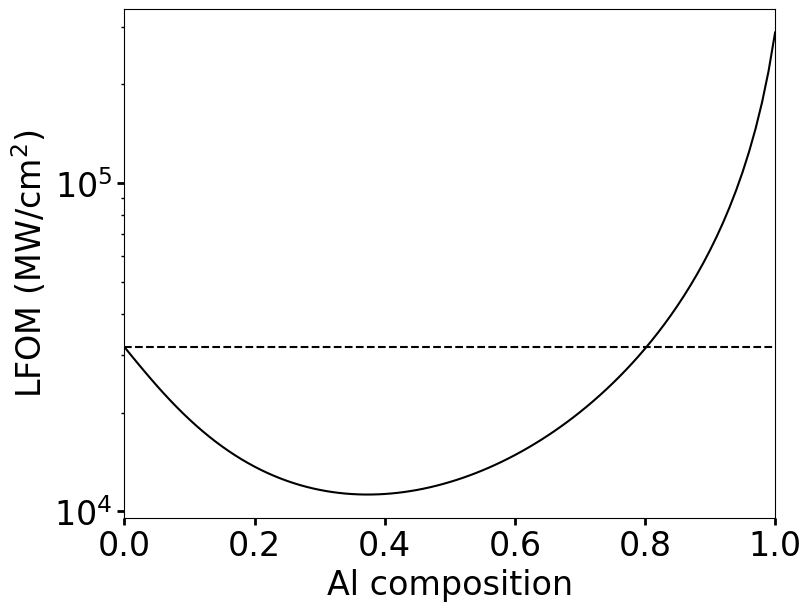

In [11]:
save_file_name_ = f'LFOM_{T}K.png'
fig, ax, _ = plt2deg.plot_2d(data_FOM_2_plot, save_file_name=save_file_name_,
                             ymin=None, ymax=None, xmax=1.0, xmin=0, y_scale_log=True,
                             yaxis_label=r'LFOM (MW/cm$^2$)', xaxis_label=x_label,
                             color='k', color_map='viridis', savefig=0, dpi=75, show_plot=False)
ax.axhline(y=data_FOM_2_plot[0,1], c='k', ls='--')
#plt.show()

In [15]:
save_file_name_ = f'LFOM_norm_{T}K.png'
data_FOM_2_plot[:, 1] /= data_FOM_2_plot[0, 1]
fig, ax, _ = plt2deg.plot_2d(data_FOM_2_plot, save_file_name=save_file_name_,
                             ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True,
                             yaxis_label=r'LFOM$_\mathrm{AlGaN}$ / LFOM$_\mathrm{GaN}$', xaxis_label=x_label,
                             color='k', color_map='viridis', savefig=0, dpi=75, show_plot=False)
ax.axhline(y=data_FOM_2_plot[0,1], c='k', ls='--')
plt2deg.save_figure(save_file_name_,fig=fig, savefig=1, dpi=75)

#### SI. Questions
SI.1 Which alloy effective mass to use? Barrier alloy or channel alloy?